## 29 - Basic Radar Plotting

[Youtube](https://www.youtube.com/watch?v=73fhfV2zOt8)

In [1]:
from datetime import datetime, timedelta
from siphon.catalog import TDSCatalog
from siphon.radarserver import RadarServer

In [2]:
cat = TDSCatalog('http://thredds.ucar.edu/thredds/radarServer/catalog.xml')

In [3]:
rs = RadarServer(cat.catalog_refs['NEXRAD Level III Radar from IDD'].href)

In [4]:
query = rs.query()
now = datetime.utcnow()
query.stations('FTG').time_range(now - timedelta(hours = 1), now).variables('N0C')

var=N0C&time_start=2022-12-20T00%3A04%3A42.428099&time_end=2022-12-20T01%3A04%3A42.428099&stn=FTG

In [5]:
query_cat = rs.get_catalog(query)

In [6]:
import cartopy
import matplotlib.pyplot as plt
import numpy as np
from siphon.cdmr import Dataset
%matplotlib inline

In [7]:
query_cat.datasets

['Level3_FTG_N0C_20221220_0018.nids', 'Level3_FTG_N0C_20221220_0053.nids', 'Level3_FTG_N0C_20221220_0025.nids', 'Level3_FTG_N0C_20221220_0039.nids', 'Level3_FTG_N0C_20221220_0046.nids', 'Level3_FTG_N0C_20221220_0011.nids', 'Level3_FTG_N0C_20221220_0032.nids', 'Level3_FTG_N0C_20221220_0100.nids']

In [8]:
data = query_cat.datasets[0].remote_access()
print(list(data.variables))

['elevation', 'azimuth', 'gate', 'latitude', 'longitude', 'altitude', 'rays_time', 'CorrelationCoefficient_RAW', 'CorrelationCoefficient']


In [9]:
field_name = 'CorrelationCoefficient'
range_data = data.variables['gate'][:]
azimuth_data = data.variables['azimuth'][:]
radar_data = data.variables[field_name][:]

In [10]:
x = range_data * np.sin(np.deg2rad(azimuth_data))[:, None]
y = range_data * np.cos(np.deg2rad(azimuth_data))[:, None]

radar_data = np.ma.array(radar_data, mask = np.isnan(radar_data))

/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


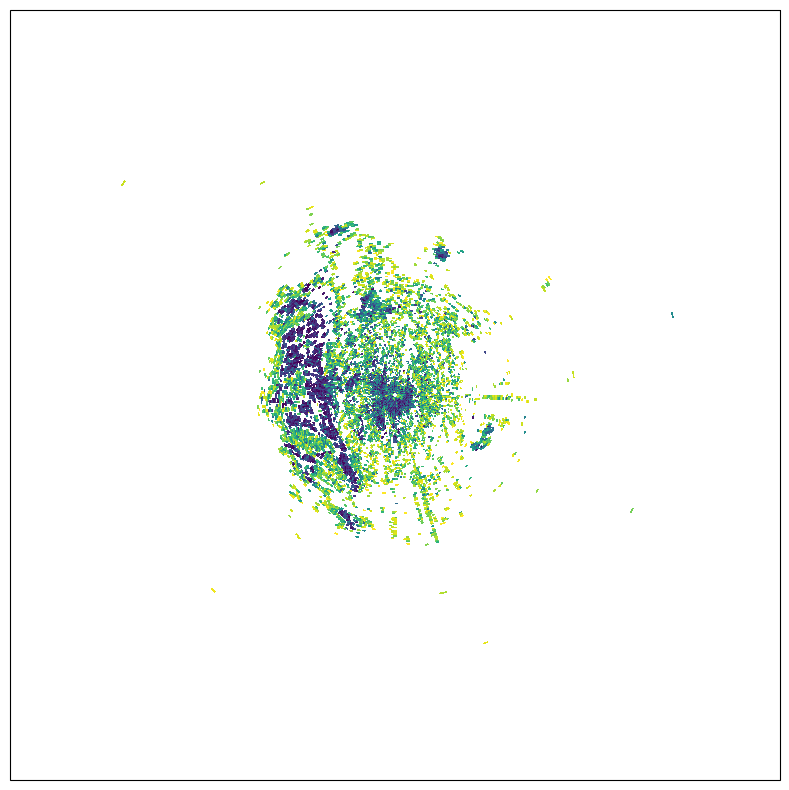

In [11]:
proj = cartopy.crs.LambertConformal(central_longitude = data.RadarLongitude, central_latitude = data.RadarLatitude)

fig = plt.figure(figsize = (10, 10))
ax = plt.subplot(1, 1, 1, projection = proj)

mesh = ax.pcolormesh(x, y, radar_data, zorder = 0)